<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU45_Planificación y promoción del destino en base a los patrones en origen de los turistas</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>09.3.- Data Cleansing - Outliers</font>

<font color='steelblue'>Data Cleaning refers to identifying and correcting (or removing) errors in the dataset that may negatively impact a predictive model, replacing, modifying, or deleting the dirty or coarse data.</font>

## <font color='steelblue'>Tasks</font>

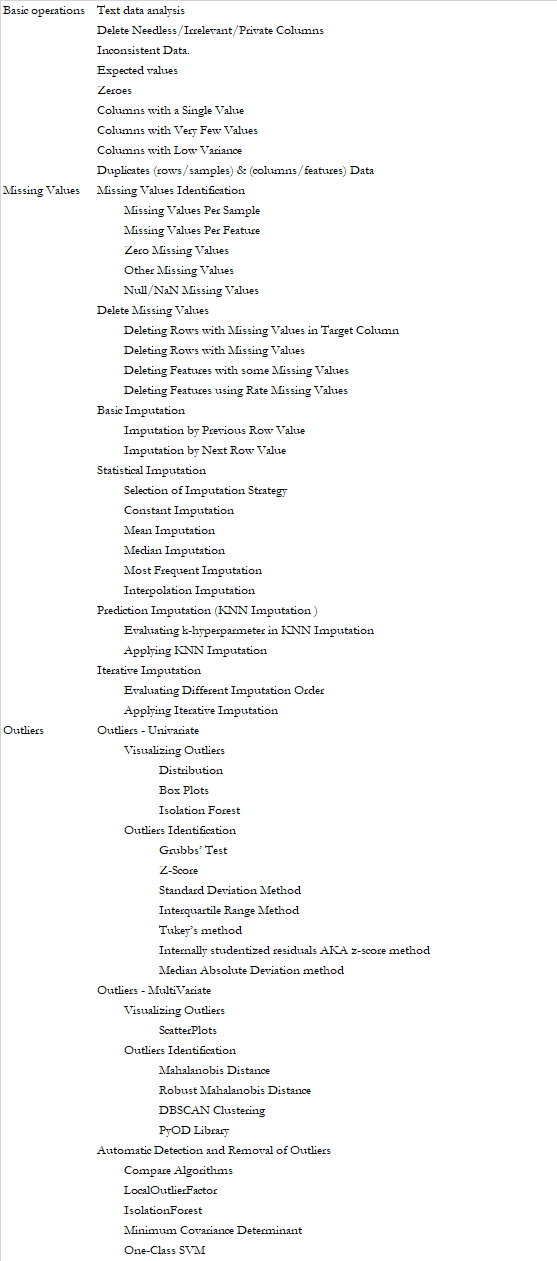


## Consideraciones casos CitizenLab programados en R

* La mayoría de las tareas de este proceso se han realizado en los notebooks del proceso 05 Data Collection porque eran necesarias para las tareas ETL. En esos casos, en este notebook se referencia al notebook del proceso 05 correspondiente
* Por tanto en los notebooks de este proceso de manera general se incluyen las comprobaciones necesarias, y comentarios si procede
* Las tareas del proceso se van a aplicar solo a los archivos que forman parte del despliegue, ya que hay muchos archivos intermedios que no procede pasar por este proceso
* El nombre de archivo del notebook hace referencia al nombre de archivo del proceso 05 al que se aplica este proceso, por eso pueden no ser correlativa la numeración
* Las comprobaciones se van a realizar teniendo en cuenta que el lenguaje utilizado en el despliegue de este caso es R

## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_45_06_03_turismo_receptor.csv</font>
- <font color='steelblue'> <b>Sampled Input File: CU_45_07_03_turismo_receptor.csv</font>
- <font color='steelblue'> <b>Output File: CU_45_09.3_03_turismo_receptor.csv</font>


### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [129]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

Warning message in Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8"):
“OS reports request to set locale to "es_ES.UTF-8" cannot be honored”


[1] ""

## <font color='green'>Settings</font>

### Libraries to use

In [10]:
library(readr)
library(dplyr)
library(tidyr)
library(stringr)
library(ggplot2)

### Paths

In [4]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [5]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [6]:
iFile <- "CU_45_06_03_turismo_receptor.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_45_06_03_turismo_receptor.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [7]:
data <- read_csv(file_data)


Rows: 50294 Columns: 8
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): mes, pais_orig_cod, pais_orig, mun_dest, CMUN
dbl (3): mun_dest_cod, turistas, Target

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


<font color='tomato'>Visualizo los datos.</font>

Estructura de  los datos:

In [8]:
data |> glimpse()

Rows: 50,294
Columns: 8
$ mes           <chr> "2019-07", "2019-07", "2019-07", "2019-07", "2019-07", "…
$ pais_orig_cod <chr> "000", "010", "011", "030", "110", "121", "123", "126", …
$ pais_orig     <chr> "Total", "Total Europa", "Total Unión Europea", "Total A…
$ mun_dest_cod  <dbl> 28002, 28002, 28002, 28002, 28002, 28002, 28002, 28002, …
$ mun_dest      <chr> "Ajalvir", "Ajalvir", "Ajalvir", "Ajalvir", "Ajalvir", "…
$ turistas      <dbl> 338, 290, 268, 37, 56, 54, 37, 40, 157, 116, 109, 8461, …
$ CMUN          <chr> "002", "002", "002", "002", "002", "002", "002", "002", …
$ Target        <dbl> 338, 290, 268, 37, 56, 54, 37, 40, 157, 116, 109, 8461, …


Muestra de los primeros datos:

In [9]:
data |> slice_head(n = 5)

mes,pais_orig_cod,pais_orig,mun_dest_cod,mun_dest,turistas,CMUN,Target
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
2019-07,000,Total,28002,Ajalvir,338,002,338
2019-07,010,Total Europa,28002,Ajalvir,290,002,290
2019-07,011,Total Unión Europea,28002,Ajalvir,268,002,268
2019-07,030,Total América,28002,Ajalvir,37,002,37
2019-07,110,Francia,28002,Ajalvir,56,002,56


## Outliers - Univariate

### Visualizing Outliers

<font color='darkgrey'><b>Operation</font>

[1]   8461   6776   5865   1074    760    567    962    605    611    873
  [11]    624   7022   5151   4287   1192    723    957   1076    658   3481
  [21]   2698   2281    597   1275   1067    968   1734   1462   1264   1878
  [31]   1531   1378    891    562   2545   2041   1722   1274   1143   1081
  [41]   1434   1218   1076   1703   1312   1124   2725   2095   1611    745
  [51]    644    575   5308   3990   3656    625    670    796    979    776
  [61]    622   6769   5243   4717    570    724   1068    865    591    928
  [71]    835    723    955    747   4636   3544   3173    885    594 427075
  [81] 244536 180533   7885 132241  85255   3036  43950  40061   2352  10347
  [91]   6788    921   2786   1148  43407   1537    952   5304  25288   2151
 [101]   1292  26777   3521  16583  48315  20965   3036   4590   6152   1772
 [111]    607   1216   4354    747   3620   3312  60577  21366    588    573
 [121]  11231   7827   8578   3066   1385   5246   4069   1809   1733  15746
 [131]   2242    755   2624   4973   4383    909   1796    906   2037   3422
 [141]   2726   2405    675    569   3666   2937   2497    767    609   1363
 [151]    962    844   3061   1872   1621    628    585   3017   2573   2414
 [161]    674   4659   3444   2873    820    603    573    836   2298   1806
 [171]   1642   4574   3504   2957    656    628    822    566   3017   2408
 [181]   1804    918    766    653    715    616   3870   2893   2537    565
 [191]    624   3434   2324   1973   1281   1054    895   6027   5799   5672
 [201]   3839   1900   1753   1632   1137   1832   1568   1338    568   1014
 [211]    970    937   1900   1556   1327   8114   6761   5915    683   1046
 [221]    717    584   1099   6752   4953   4126   1063    582    973   1089
 [231]    648    620   3907   3058   2550    670   1278   1060    923   2137
 [241]   1794   1604   2223   1838   1656    957    636    574   2624   2166
 [251]   1880   2037   1731   1643   1538   1300   1117   1963   1612   1391
 [261]   2959   2226   1868    571   1141   1026    888   5472   4327   3983
 [271]    764    606    905   1322   1050    841   7114   5695   5128    590
 [281]    562   1150   1061    622   1182   1024    810    579   4747   3807
 [291]   3422    970    685    595 374962 227419 171460   8529 102424  59248
 [301]   2214  40962  35037   1553   8158   5392    693   2124  44703   1587
 [311]    867   4876  25109   2055    826  24568   2805  17282  43721  20415
 [321]   2445   4166   4579   1486    962    576   3683    665    638   4368
 [331]   2911  40905  15432  11053   6285   7068   2397   1766    639   4740
 [341]   4145   2625   2146  13501   2161    695   1573   4549   4121    976
 [351]   1331    758   1363   3403   2682   2313    622    746    650    604
 [361]    649    641   4451   3606   3040    871    687    805    675    590
 [371]   1707   1261    943   3337   2224   1951   3209   2817   2569    825
 [381]   4334   3321   2782    624    605    812   2645   2047   1853    633
 [391]   4683   3708   3116    580    763    836    624   2829   2203   1760
 [401]   1267   1105    921   1012    921    844   4178   3129   2721    750
 [411]    572   3783   2609   2238   1315   1111    947   4429   4097   3891
 [421]   1794    994    838    717   1360   1172   1010    756    653    608
 [431]   1902   1552   1334   8174   6553   5642    811    970    607    588
 [441]    926   7551   5335   4323   1307    734    660    859    884    770
 [451]    587   3868   2802   2305    599   1030    838    686   2039   1586
 [461]   1419   2053   1594   1404   1203    610    569   2524   2085   1795
 [471]   1691   1450   1387   1383   1085    920   1683   1264   1102   2765
 [481]   2218   1840    570   5000   3474   3099    691    592    628   1061
 [491]    814    677   7080   5128   4522    725    960    949    828    714
 [501]   1055    882    770   4844   3506   3105    818 444383 272566 202070
 [511]   8558 122342  69814   3581  48947  38403   2514  13823   8173   1002

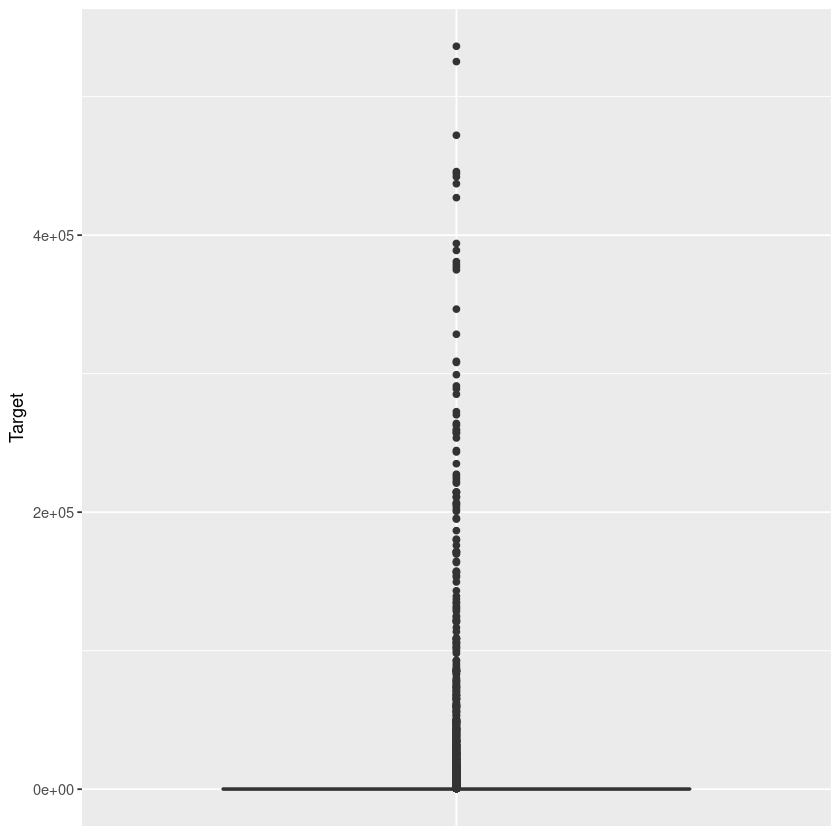

In [19]:
# Get the names of all numeric columns
ggplot(data, aes(x = "", y = Target)) +
  geom_boxplot() +
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank())
boxplot.stats(data$Target)$out

#### Isolation Forest

La cantidad de posibles valores hace que este proceso no aporte información

<font color='tomato'>Selecting feature to analyze</font>

In [24]:
# # Selecting # Selecting feature to analyze
# x <- "CMUN"  # replace with your column namefeature to plot
# y <- "Target"  # replace with your column namefeature to plot

<font color='darkgrey'><b>Operation</font>

In [25]:
# if(!require(solitude)) install.packages('solitude')
# if(!require(ggplot2)) install.packages('ggplot2')
# if(!require(plotly)) install.packages('plotly')

# library(solitude)
# library(ggplot2)
# library(plotly)

# model <- isolationForest$new(num_trees = 100)
# model$fit(data)

# anomaly_scores <- model$predict(data)
# data$anomaly_scores <- anomaly_scores

# # Create a scatter plot with anomaly scores as the color
# plot <- ggplot(data, aes(x = x, y = y, color = anomaly_scores)) +
#   geom_point() +
#   scale_color_gradient(low = "blue", high = "red") +
#   theme_minimal() +
#   ggtitle("Isolation Forest Anomaly Scores")

# # Convert to an interactive plotly plot
# plotly::ggplotly(plot)

### Outliers Identification

#### Grubbs’ Test

<font color='tomato'>Selecting feature to analyze</font>

In [26]:
# # Selecting feature to analyze
# column_name <- "Target"  # replace with your column name


<font color='darkgrey'><b>Operation</font>

In [30]:
if (!require(outliers)) {
    install.packages("outliers")
}

library(outliers)

print(grubbs.test(data[["Target"]], opposite = FALSE))


	Grubbs test for one outlier

data:  data[["Target"]]
G = 47.38627, U = 0.95535, p-value < 2.2e-16
alternative hypothesis: highest value 536369 is an outlier



#### Z-Score

<font color='tomato'>Selecting feature to analyze</font>

In [31]:
# Selecting feature to analyze
column_name <- "Target"  # replace with your column name

<font color='darkgrey'><b>Operation</font>

In [34]:
# Define a threshold to identify an outlier.
# List of row numbers with outlier 
# Choose the numeric column from your data

# Calculate the z-score
z_scores <- scale(data[[column_name]])

# Define a threshold for identifying outliers (e.g., z-score > 5 or z-score < -5)
threshold <- 5

<font color='darkgrey'><b>Operation</font>

In [35]:

# Find the row numbers with z-scores exceeding the threshold
outlier_rows <- which(abs(z_scores) > threshold)

# Print the row numbers with outliers
print(outlier_rows)

  [1]   653   654   655   657   658   726  2219  2220  2221  2223  2224  3785
 [13]  3786  3787  3789  3790  5333  5334  5335  5337  5338  5364  6800  6801
 [25]  6802  6804  8238  8239  8240  8242  9727  9728  9729  9731 11147 11148
 [37] 11149 11151 12440 12441 12442 15237 16309 16310 16311 17489 17490 17491
 [49] 18636 18637 18638 19730 19731 19732 20784 20785 20786 21861 21862 21863
 [61] 22935 22936 22937 23934 23935 23936 24912 24913 24914 25934 25935 25936
 [73] 26960 26961 26962 28070 28071 28072 29273 29274 29275 30555 30556 30557
 [85] 31839 31840 31841 33136 33137 33138 33140 34452 34453 34454 34456 35731
 [97] 35732 35733 35735 37020 37021 37022 37024 38250 38251 38252 39434 39435
[109] 39436 39438 40714 40715 40716 40718 40719 42106 42107 42108 42110 42111
[121] 43526 43527 43528 43530 43531 43598 44968 44969 44970 44972 44973 45042
[133] 46444 46445 46446 46448 46449 47933 47934 47935 47937 47938 48004 49447
[145] 49448 49449 49451 49452 49454 49464 49522


#### Standard Deviation Method

<font color='darkgrey'><b>Operation</font>

In [36]:
# Selecting feature to analyze
column_name <- "Target"  # replace with your column name
     

In [37]:
# identify outliers with standard deviation
# Choose the numeric column from your data
column_name_df <- data[[column_name]]

# Calculate the mean and standard deviation of the column
column_mean <- mean(column_name_df)
column_sd <- sd(column_name_df)

# Define the threshold as a multiple of the standard deviation (e.g., 3 times the standard deviation)
threshold <- 3

# Identify the outliers based on the threshold
outliers <- column_name_df > (column_mean + threshold * column_sd) | column_name_df < (column_mean - threshold * column_sd)

# Remove the outliers from the column
column_name_df[!outliers] <- NA

# Print the updated column with outliers removed
print(column_name_df)

    [1]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [11]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [21]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [31]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [41]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [51]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [61]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [71]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [81]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [91]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [101]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [111]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [121]     NA     NA     NA     NA     NA     NA     NA     NA 

#### Interquartile Range Method

<font color='tomato'>Selecting factor k</font>

In [38]:
# Selecting feature to analyze
column_name <- "Target"  # replace with your column name

# Selecting factor k
# Define the threshold as a multiplier of the IQR (e.g., 1.5 times the IQR)
threshold <- 1.5

<font color='darkgrey'><b>Operation</font>

In [39]:
# Choose the numeric column from your data
column_name_df <- data[[column_name]]

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 <- quantile(column_name_df, 0.25)
Q3 <- quantile(column_name_df, 0.75)

# Calculate the IQR (Interquartile Range)
IQR <- Q3 - Q1



# Identify the outliers based on the threshold
outliers <- column_name_df < (Q1 - threshold * IQR) | column_name_df > (Q3 + threshold * IQR)

# Remove the outliers from the column
column_name_df[!outliers] <- NA

# Print the updated column with outliers removed
print(column_name_df)


    [1]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [11]     NA   8461   6776   5865     NA   1074    760     NA     NA    567
   [21]     NA     NA     NA    962     NA     NA     NA     NA    605     NA
   [31]     NA    611    873     NA     NA     NA     NA     NA     NA     NA
   [41]     NA     NA    624     NA     NA     NA     NA     NA     NA   7022
   [51]   5151   4287     NA   1192    723     NA     NA     NA     NA     NA
   [61]    957     NA     NA     NA   1076     NA     NA    658     NA     NA
   [71]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
   [81]     NA     NA     NA     NA     NA     NA     NA     NA     NA   3481
   [91]   2698   2281     NA     NA     NA     NA     NA     NA     NA     NA
  [101]    597     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [111]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
  [121]     NA     NA     NA     NA   1275   1067    968     NA 

#### Tukey’s method

In [40]:
# Selecting feature to analyze
column_name <- "Target"  # replace with your column name     

In [45]:
#Tukey's method
column_name_df <- data[[column_name]]
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 <- quantile(column_name_df, 0.25)
Q3 <- quantile(column_name_df, 0.75)

# Calculate the interquartile range (IQR)
IQR <- Q3 - Q1

# Define the multiplier for Tukey's method (e.g., 1.5 times the IQR)
multiplier <- 1.5

# Calculate the lower and upper bounds for outliers
lower_bound <- Q1 - multiplier * IQR
upper_bound <- Q3 + multiplier * IQR

# Identify the outliers based on the bounds
outliers <- column_name_df < lower_bound | column_name_df > upper_bound

# Remove the outliers from the column
column_name_df[!outliers] <- NA

# Print the updated column with outliers removed
print(column_name_df)

logical(0)


#### Internally studentized residuals AKA z-score method

In [46]:
# Selecting feature to analyze
column_name <- "Target"  # replace with your column name     


In [47]:
#Internally studentized method (z-score)
# Calculate the z-scores for each data point
column_name_df <- data[[column_name]]
z_scores <- scale(column_name_df)

# Define a threshold for identifying outliers (e.g., z-score > 3 or z-score < -3)
threshold <- 3

# Identify the outliers based on the z-scores
outliers <- abs(z_scores) > threshold

# Remove the outliers from the column by replacing them with NA
column_name_df[outliers] <- NA

# Print the updated column with outliers removed
print(column_name_df)

    [1]   338   290   268    37    56    54    37    40   157   116   109  8461
   [13]  6776  5865   199  1074   760   258   409   567   165   104    92   962
   [25]    92   176   380   170   605   284   405   611   873   362   500   101
   [37]   115    57    32    78    63    45   624    47    50    70    31   187
   [49]   181  7022  5151  4287   167  1192   723   458   495   416   173    79
   [61]   957   113   215    81  1076    68   355   658   458    47   151   115
   [73]    35   109    54   503   166    74    80   143    41    47    31   161
   [85]    42    65    45    52    42  3481  2698  2281   164   410   228   176
   [97]   205   226    81    38   597    43   117    89   448    65   166   236
  [109]   208    57   116    34   122    43    99   164    30    52    94    35
  [121]    47   143   117   109  1275  1067   968    47   118    93    42    51
  [133]   104   238    36   158    64    30    76   151    48    38    69    30
  [145]   410   356   293    40    99   

#### Median Absolute Deviation method

In [48]:
# Selecting feature to analyze
column_name <- "Target"  # replace with your column name     


In [49]:
#MAD method
column_name_df <- data[[column_name]]
# Calculate the median absolute deviation (MAD)
mad <- median(abs(column_name_df - median(column_name_df, na.rm = TRUE)), na.rm = TRUE)

# Define a threshold for identifying outliers (e.g., 3 times the MAD)
threshold <- 3 * mad

# Identify the outliers based on the MAD
outliers <- abs(column_name_df - median(column_name_df, na.rm = TRUE)) > threshold

# Remove the outliers from the column by replacing them with NA
column_name_df[outliers] <- NA

# Print the updated column with outliers removed
print(column_name_df)

    [1]  NA  NA 268  37  56  54  37  40 157 116 109  NA  NA  NA 199  NA  NA 258
   [19]  NA  NA 165 104  92  NA  92 176  NA 170  NA  NA  NA  NA  NA  NA  NA 101
   [37] 115  57  32  78  63  45  NA  47  50  70  31 187 181  NA  NA  NA 167  NA
   [55]  NA  NA  NA  NA 173  79  NA 113 215  81  NA  68  NA  NA  NA  47 151 115
   [73]  35 109  54  NA 166  74  80 143  41  47  31 161  42  65  45  52  42  NA
   [91]  NA  NA 164  NA 228 176 205 226  81  38  NA  43 117  89  NA  65 166 236
  [109] 208  57 116  34 122  43  99 164  30  52  94  35  47 143 117 109  NA  NA
  [127]  NA  47 118  93  42  51 104 238  36 158  64  30  76 151  48  38  69  30
  [145]  NA  NA  NA  40  99  51  55  45  59  46  40  62  54  50  NA  NA  NA 116
  [163] 138  83  54  50  67  NA  66  56 217  66 156 136  52  95 106  65  NA  NA
  [181]  NA  44 248 138 108  52  87  40  NA 106  55  NA  70 101 129 158  54 120
  [199]  30  NA  NA  NA  47 270  66 155  91  33  40  73 263  67  57  54  47  40
  [217]  37  92  71  62  75  68  56 198 

#### DBSCAN Clustering

<font color='tomato'>Selecting feature to analyze</font>

In [52]:
# Selecting feature to analyze
column_name <- "Target"  # replace with your column name     

<font color='darkgrey'><b>Operation</font>

In [56]:
if(!require(dbscan)){
    install.packages("dbscan")
}
library(dbscan)

# Select the numeric columns from the data frame
numeric_data <- data[, column_name]

# Perform DBSCAN clustering on the numeric data
dbscan_result <- dbscan(numeric_data, eps = 0.5, minPts = 5)

# Extract the cluster labels assigned by DBSCAN
cluster_labels <- dbscan_result$cluster


In [57]:
# Index of rows with outliers
# Identify the outliers as points that are not assigned to any cluster (noise points)
outlier_indices <- which(cluster_labels == 0)
outlier_indices

[1]    12    13    14    16    33    50    51    52    54    65    90    91
  [13]    92   126   159   160   161   179   180   181   200   229   230   231
  [25]   318   319   357   358   359   383   384   385   411   412   413   469
  [37]   470   471   490   509   510   529   530   531   541   559   594   610
  [49]   611   612   621   653   654   655   656   657   658   659   660   661
  [61]   662   664   665   668   669   670   671   672   673   675   677   679
  [73]   680   681   682   684   685   686   687   688   689   696   702   717
  [85]   725   726   727   737   738   739   740   741   743   744   745   746
  [97]   748   749   751   755   756   763   764   765   768   773   775   776
 [109]   777   867   868   869   927   946   947   948   990   991   992  1018
 [121]  1019  1020  1069  1070  1071  1109  1110  1111  1124  1149  1150  1179
 [133]  1191  1212  1213  1214  1284  1285  1286  1326  1327  1328  1375  1376
 [145]  1377  1382  1446  1447  1453  1474  1475  1476  1504  1506  1511  1512
 [157]  1513  1544  1545  1546  1556  1566  1583  1584  1585  1587  1594  1620
 [169]  1621  1622  1656  1657  1658  1691  1692  1693  1714  1715  1716  1770
 [181]  1771  1772  1870  1871  1872  1911  1912  1913  1939  1940  1941  1965
 [193]  1967  2009  2010  2011  2032  2033  2034  2043  2053  2070  2071  2072
 [205]  2091  2092  2093  2103  2107  2137  2174  2175  2176  2219  2220  2221
 [217]  2222  2223  2224  2225  2226  2227  2228  2230  2231  2234  2236  2237
 [229]  2238  2239  2241  2243  2245  2246  2247  2248  2250  2251  2252  2253
 [241]  2254  2255  2268  2283  2292  2293  2294  2304  2306  2307  2308  2309
 [253]  2311  2312  2313  2314  2316  2318  2319  2323  2324  2331  2332  2341
 [265]  2343  2344  2345  2377  2446  2447  2448  2489  2514  2516  2535  2536
 [277]  2537  2582  2583  2584  2609  2610  2611  2657  2658  2659  2696  2697
 [289]  2698  2738  2739  2740  2765  2766  2779  2801  2802  2803  2878  2879
 [301]  2880  2924  2925  2975  2976  2977  2983  3051  3081  3082  3083  3114
 [313]  3115  3116  3147  3148  3149  3169  3189  3190  3191  3193  3194  3195
 [325]  3205  3232  3233  3234  3267  3269  3295  3297  3319  3320  3321  3374
 [337]  3375  3376  3452  3453  3454  3491  3492  3493  3513  3514  3535  3536
 [349]  3537  3599  3600  3601  3639  3661  3662  3663  3668  3673  3677  3693
 [361]  3704  3739  3740  3741  3751  3785  3786  3787  3788  3789  3790  3791
 [373]  3792  3793  3794  3796  3797  3800  3801  3802  3803  3804  3805  3807
 [385]  3810  3811  3812  3813  3814  3816  3817  3818  3819  3820  3821  3828
 [397]  3831  3834  3850  3860  3861  3862  3866  3870  3873  3874  3875  3876
 [409]  3877  3879  3880  3881  3882  3884  3885  3887  3891  3892  3900  3910
 [421]  3912  3913  3914  4010  4011  4012  4069  4070  4071  4091  4092  4093
 [433]  4133  4134  4135  4143  4158  4159  4160  4173  4205  4206  4207  4241
 [445]  4242  4243  4280  4281  4282  4312  4329  4351  4352  4353  4355  4423
 [457]  4424  4425  4473  4475  4520  4521  4522  4528  4593  4594  4599  4625
 [469]  4657  4658  4659  4691  4692  4693  4703  4714  4734  4735  4736  4740
 [481]  4745  4753  4754  4773  4774  4775  4809  4810  4811  4840  4841  4865
 [493]  4866  4867  4886  4914  4915  4916  4997  4998  4999  5037  5038  5039
 [505]  5059  5060  5061  5085  5086  5087  5148  5149  5150  5160  5191  5192
 [517]  5211  5212  5213  5218  5223  5227  5252  5275  5289  5290  5291  5301
 [529]  5333  5334  5335  5336  5337  5338  5339  5340  5341  5344  5345  5346
 [541]  5348  5349  5350  5351  5352  5353  5355  5357  5359  5360  5361  5362
 [553]  5364  5365  5366  5367  5368  5369  5376  5377  5379  5382  5390  5396
 [565]  5405  5406  5407  5408  5417  5419  5420  5421  5422  5423  5424  5425
 [577]  5426  5427  5430  5432  5433  5437  5438  5446  5447  5448  5450  5451
 [589]  5456  5458  5459  5460  5544  5545  5546  5605  5606  5607  5627  5628
 [601]  5629  5666  5667  5668  5675  5691  5692  569